In [1]:
from sklearn import preprocessing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/data analytics/Stroke_Prediction_Dataset/train.csv') 
test = pd.read_csv('/content/drive/MyDrive/data analytics/Stroke_Prediction_Dataset/test.csv')
submit = pd.read_csv('/content/drive/MyDrive/data analytics/Stroke_Prediction_Dataset/sample_submission.csv')

In [4]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [5]:
print(train.shape)
print(test.shape)

(15304, 12)
(10204, 11)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [7]:
result = train.apply(lambda x : x.unique())
print(result)

print(train.work_type.unique())

id                   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
gender                                           [Male, Female, Other]
age                  [28.0, 33.0, 42.0, 56.0, 24.0, 34.0, 53.0, 78....
hypertension                                                    [0, 1]
heart_disease                                                   [0, 1]
ever_married                                                 [Yes, No]
work_type            [Private, Self-employed, Govt_job, children, N...
Residence_type                                          [Urban, Rural]
avg_glucose_level    [79.53, 78.44, 103.0, 64.87, 73.36, 84.35, 88....
bmi                  [31.1, 23.9, 40.3, 28.8, 22.2, 25.3, 24.8, 34....
smoking_status        [never smoked, formerly smoked, Unknown, smokes]
stroke                                                          [0, 1]
dtype: object
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


In [8]:
data = pd.concat([train,test])
data.reset_index(inplace=True, drop=True)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0.0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0.0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0.0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0.0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25503,25503,Female,27.0,0,0,No,Private,Urban,75.77,17.6,never smoked,NaN
25504,25504,Male,49.0,0,0,Yes,Private,Urban,102.91,26.7,Unknown,NaN
25505,25505,Female,3.0,0,0,No,children,Rural,104.04,18.3,Unknown,NaN
25506,25506,Male,31.0,0,0,Yes,Private,Urban,82.41,28.7,never smoked,NaN


Female    15784
Male       9722
Other         2
Name: gender, dtype: int64

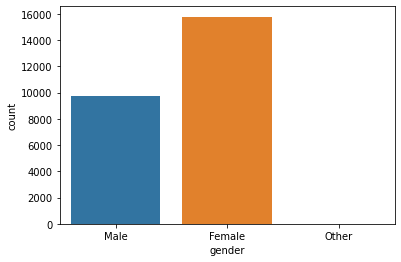

In [9]:
sns.countplot(x='gender', data=data)

value_counts = data['gender'].value_counts()
value_counts

0.0    14672
1.0      632
Name: stroke, dtype: int64

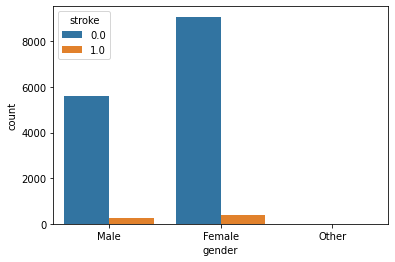

In [10]:
sns.countplot(x='gender', data=data, hue=data['stroke'])

value_counts = data['stroke'].value_counts()
value_counts

資料集中共有"25508"人
其中"632"人有中風,約是2.48%的人
全部人中共有"1286"人有高血壓
全部人中共有"128"人同時有高血壓跟中風
高血壓患者中風的比例為9.950000000000001%


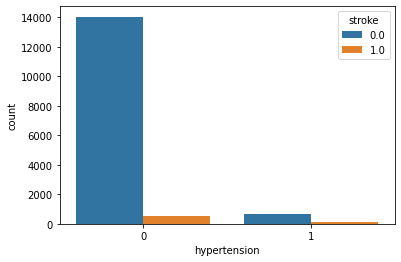

In [11]:
sns.countplot(x='hypertension', data=data, hue=data['stroke'])
stroke_1 = data[data['stroke'] == 1].shape[0]
print(f'資料集中共有"{data.shape[0]}"人')
print(f'其中"{data[data.stroke == 1].shape[0]}"人有中風,約是{round(data[data.stroke == 1].shape[0]/data.shape[0]*100,2)}%的人')

hypertension_1 = data[data['hypertension'] == 1].shape[0] #有高血壓
print(f'全部人中共有"{hypertension_1}"人有高血壓')
result = data[(data['hypertension'] == 1) & (data['stroke'] == 1)].shape[0]
print(f'全部人中共有"{result}"人同時有高血壓跟中風')
print(f'高血壓患者中風的比例為{round(result/hypertension_1,4)*100}%')




資料集中共有"25508"人
其中"632"人有中風,約是2.48%的人
全部人中共有"579"人有心臟病
全部人中共有"66"人同時有心臟病跟中風
心臟病患者中風的比例為5.13%


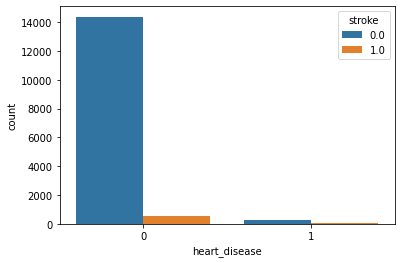

In [12]:
#heart_disease

sns.countplot(x='heart_disease', data=data, hue=data['stroke'])
stroke_1 = data[data['stroke'] == 1].shape[0]
print(f'資料集中共有"{data.shape[0]}"人')
print(f'其中"{data[data.stroke == 1].shape[0]}"人有中風,約是{round(data[data.stroke == 1].shape[0]/data.shape[0]*100,2)}%的人')

heart_disease_1 = data[data['heart_disease'] == 1].shape[0] #有高血壓
print(f'全部人中共有"{heart_disease_1}"人有心臟病')
result = data[(data['heart_disease'] == 1) & (data['stroke'] == 1)].shape[0]
print(f'全部人中共有"{result}"人同時有心臟病跟中風')
print(f'心臟病患者中風的比例為{round(result/hypertension_1,4)*100}%')

In [13]:
#查看資料
result = data.apply(lambda x : x.unique())
print(result)


id                   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
gender                                           [Male, Female, Other]
age                  [28.0, 33.0, 42.0, 56.0, 24.0, 34.0, 53.0, 78....
hypertension                                                    [0, 1]
heart_disease                                                   [0, 1]
ever_married                                                 [Yes, No]
work_type            [Private, Self-employed, Govt_job, children, N...
Residence_type                                          [Urban, Rural]
avg_glucose_level    [79.53, 78.44, 103.0, 64.87, 73.36, 84.35, 88....
bmi                  [31.1, 23.9, 40.3, 28.8, 22.2, 25.3, 24.8, 34....
smoking_status        [never smoked, formerly smoked, Unknown, smokes]
stroke                                                 [0.0, 1.0, nan]
dtype: object


In [14]:
target = train['stroke']

data = train.drop('stroke',axis = 1).append(test)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
10199,25503,Female,27.0,0,0,No,Private,Urban,75.77,17.6,never smoked
10200,25504,Male,49.0,0,0,Yes,Private,Urban,102.91,26.7,Unknown
10201,25505,Female,3.0,0,0,No,children,Rural,104.04,18.3,Unknown
10202,25506,Male,31.0,0,0,Yes,Private,Urban,82.41,28.7,never smoked


In [15]:
#檢查unique

for col in data:
  if data[col].dtype =='O': #object
    print(col, data[col].unique())


gender ['Male' 'Female' 'Other']
ever_married ['Yes' 'No']
work_type ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type ['Urban' 'Rural']
smoking_status ['never smoked' 'formerly smoked' 'Unknown' 'smokes']


In [16]:
from sklearn import preprocessing  #label encoding
# from sklearn.preprocessing import OneHotEncoder #one hot encoding
le = preprocessing.LabelEncoder()

data['gender'] = le.fit_transform(data['gender'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['work_type'] = le.fit_transform(data['work_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

In [17]:
data.shape

(25508, 11)

In [18]:
data = data.reset_index(drop=True)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,1,28.0,0,0,1,2,1,79.53,31.1,2
1,1,1,33.0,0,0,1,2,0,78.44,23.9,1
2,2,0,42.0,0,0,1,2,0,103.00,40.3,0
3,3,1,56.0,0,0,1,2,1,64.87,28.8,2
4,4,0,24.0,0,0,0,2,0,73.36,28.8,2
...,...,...,...,...,...,...,...,...,...,...,...
25503,25503,0,27.0,0,0,0,2,1,75.77,17.6,2
25504,25504,1,49.0,0,0,1,2,1,102.91,26.7,0
25505,25505,0,3.0,0,0,0,4,0,104.04,18.3,0
25506,25506,1,31.0,0,0,1,2,1,82.41,28.7,2


In [19]:
data = (data - data.min()) / (data.max() - data.min())
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.000000,0.5,0.340820,0.0,0.0,1.0,0.5,1.0,0.114881,0.238259,0.666667
1,0.000039,0.5,0.401855,0.0,0.0,1.0,0.5,0.0,0.109752,0.155785,0.333333
2,0.000078,0.0,0.511719,0.0,0.0,1.0,0.5,0.0,0.225339,0.343643,0.000000
3,0.000118,0.5,0.682617,0.0,0.0,1.0,0.5,1.0,0.045887,0.211913,0.666667
4,0.000157,0.0,0.291992,0.0,0.0,0.0,0.5,0.0,0.085843,0.211913,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
25503,0.999843,0.0,0.328613,0.0,0.0,0.0,0.5,1.0,0.097186,0.083620,0.666667
25504,0.999882,0.5,0.597168,0.0,0.0,1.0,0.5,1.0,0.224915,0.187858,0.000000
25505,0.999922,0.0,0.035645,0.0,0.0,0.0,1.0,0.0,0.230233,0.091638,0.000000
25506,0.999961,0.5,0.377441,0.0,0.0,1.0,0.5,1.0,0.128436,0.210767,0.666667


In [21]:
#定義 X跟y

X = data[:len(train)]
X_test = data[len(train):]
y = target

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=27)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

print(X_test.shape)


(13773, 11)
(1531, 11)
(13773,)
(1531,)
(10204, 11)


In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', random_state = 27).fit(X_train, y_train)
print(model.score(X_train,y_train))

0.7872649386480796


In [33]:
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)
print(model.score(X_val, y_val))
y_proba[:,1]

0.7883736120182887


array([0.00804217, 0.05612629, 0.023392  , ..., 0.85001446, 0.13980088,
       0.16944246])

In [34]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_val, y_pred))

[[1158  314]
 [  10   49]]


In [35]:
predictions = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)
y_test_proba[:,1]

array([0.3728944 , 0.75044249, 0.00290132, ..., 0.00192134, 0.04894555,
       0.0013705 ])

In [36]:
submit.stroke = y_test_proba[:,1]
submit.to_csv('/content/drive/MyDrive/data analytics/Stroke_Prediction_Dataset/submit.csv', index= False)

submission = pd.read_csv('/content/drive/MyDrive/data analytics/Stroke_Prediction_Dataset/submit.csv')
submission

,id,stroke
0,15304,0.372894
1,15305,0.750442
2,15306,0.002901
3,15307,0.564653
4,15308,0.094200
...,...,...
10199,25503,0.027255
10200,25504,0.191882
10201,25505,0.001921
10202,25506,0.048946
